In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from pytorch_fre.pytorch_fre_modules import FreCalc
from dataset import ShapeNet15kPointCloudsAugmented
from model.model import PVCU_Fast

/home/zister/miniconda3/envs/3d_diff_2.0/lib/python3.8/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [99]:
data = ShapeNet15kPointCloudsAugmented(categories=['chair'])
freCalc = FreCalc()

Total number of data:4612
Min number of points: (train)4096 (test)4096
RADIUS:: [3.2160678 3.19449   2.9494474 ... 2.6361394 3.113176  3.031204 ]
Calculating harmonics for training data


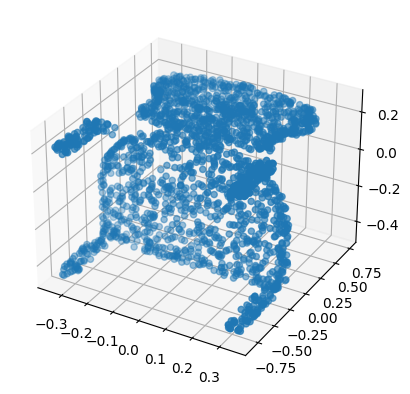

In [100]:
# plot pc using matplotlib
def plot_pc(pc):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2])
    plt.show()
plot_pc(data[24][0])

In [101]:
import math
torch.pi = math.pi
coeff, view = freCalc(data[50][0].unsqueeze(0).cuda(), visualize=True)

[KeOps] Generating code for ArgKMin_Reduction reduction (with parameters 1) of formula Sum((a-b)**2) with a=Var(0,2,0), b=Var(1,2,1) ... OK


In [102]:
for item in view:
    print(item.shape)
feats = view[0]
sph_coord = view[1]
interp = view[2]

torch.Size([1, 1, 2048])
torch.Size([1, 2048, 2])
torch.Size([1, 1, 524288])


In [103]:
color1 = np.array([242.0/255, 211.0/255, 152.0/255]), # Yellow
color2 = np.array([86.0/255, 135.0/255, 109.0/255]) # Green
from PIL import Image
interp_img = interp.cpu().numpy()
#normalize between 0 and 1
interp_img = interp_img - interp_img.min()
interp_img = interp_img / interp_img.max()
#interp_img = interp_img * 255
# mix the colors based on interp_img
interp_img = interp_img.squeeze()[:, None]
interp_color = color1 * interp_img + color2 * (1 - interp_img)
interp_color = interp_color.reshape(512, 1024, 3)*255
# show the image
im = Image.fromarray((interp_color).astype(np.uint8))
im.save("../poster/fre_loss_visu/interp_color.png")

In [104]:
interp_img.squeeze()[:, None].shape)

# show the image
im = Image.fromarray((interp_image * 255).astype(np.uint8))
im.save("../poster/fre_loss_visu/interp_color.png")

SyntaxError: unmatched ')' (2838956827.py, line 1)

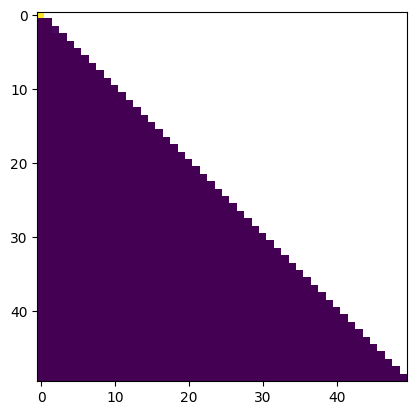

In [105]:
rect_weights = torch.exp(-((50 - torch.arange(1, 50+1))**2)/(2*50)).numpy()
import matplotlib.colors as colors
np_coeff = coeff.cpu().numpy()
# make a histogram of the coefficients
# make 0 transparent

# Normalize the data between 0 and 1
zeros = np_coeff[0] != 0
np_coeff = (np_coeff**2)# * rect_weights[:, None]
norm = colors.Normalize(vmin=np_coeff[0].min(), vmax=np_coeff[0].max())
# Create a colormap
cmap = plt.get_cmap('viridis')

# Map the normalized data to RGBA colors
rgba_image = cmap(norm(np_coeff[0]))

# Make the alpha channel 0 where the data is 0
rgba_image[..., 3] = (zeros)

# Display the image
plt.imshow(rgba_image)


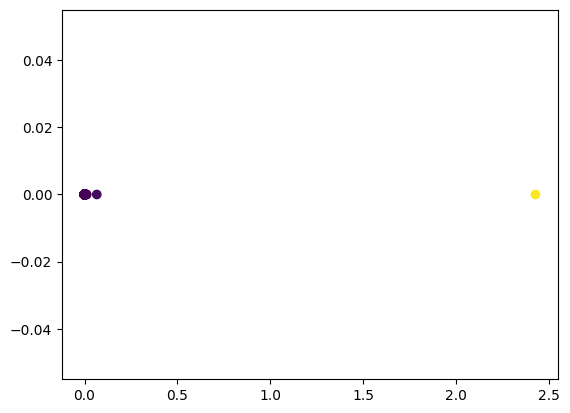

In [106]:
nonzeros = np_coeff[np_coeff != 0]
plt.scatter(nonzeros, np.zeros_like(nonzeros), c=np.abs(nonzeros), cmap='viridis')